In [1]:
import numpy as np
from random import randrange
import random
import pandas as pd
from shapely.geometry import LineString
import plotly.express as px
import plotly.graph_objects as go

In [2]:
random.seed(25)

p1 = np.array([randrange(1,10) for i in range(3)])
p2 = np.array([randrange(3,17) for i in range(3)])

d01 = 2.3

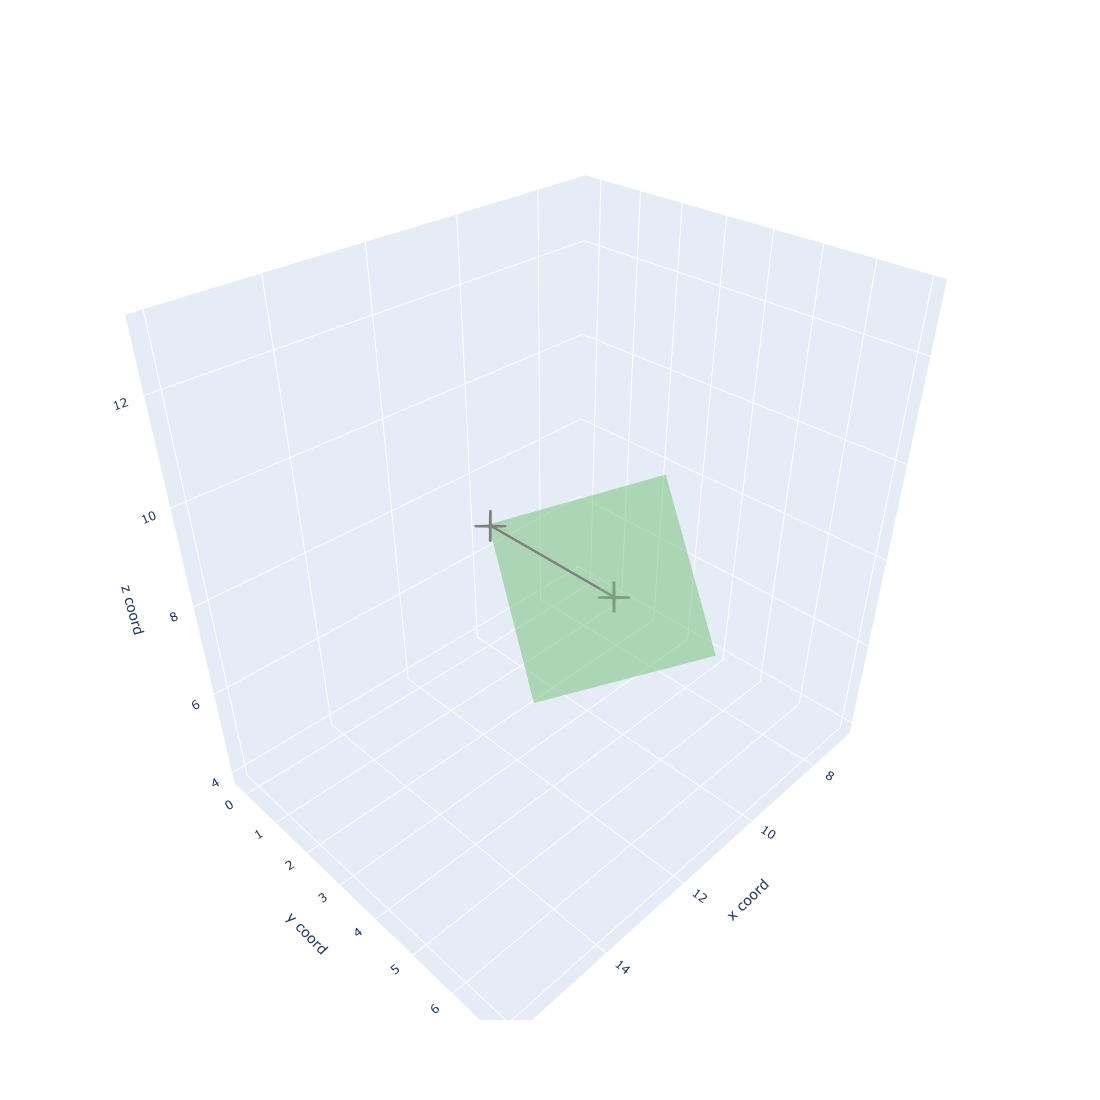

In [28]:
def drawing(p1, p2, d01, r):
    # p0 position
    line = LineString([p1, p2])
    p0_tmp = line.interpolate(d01)
    p0 = np.array([p0_tmp.x, p0_tmp.y, p0_tmp.z])
    # preparation
    P1 = p0
    P2 = p2
    Radius = r
    V3 = P1 - P2
    V3 = V3 / np.linalg.norm(V3)
    e = np.array([0,0,0])
    e[np.argmin(np.abs(V3))] = 1
    V1 = np.cross(e, V3)
    V1 = V1 / np.linalg.norm(V3)
    V2 = np.cross(V3, V1)

    # p3 90 degree
    s3 = np.pi/2
    p3 = P1 + Radius*( np.cos(s3)*V1 + np.sin(s3)*V2 ) 
    # p4 180 degree
    s4 = np.pi
    p4 = P1 + Radius*( np.cos(s4)*V1 + np.sin(s4)*V2 ) 
    # p5 270 degree
    s5 = np.pi*1.5
    p5 = P1 + Radius*( np.cos(s5)*V1 + np.sin(s5)*V2 )
    # p6 0 degree
    s6 = 0
    p6 = P1 + Radius*( np.cos(s6)*V1 + np.sin(s6)*V2 )
    
    # draw
    ## line
    fig = go.Figure(data =[go.Scatter3d(x=[p1[0],p2[0]], y=[p1[1], p2[1]],z=[p1[2], p2[2]],
                                        mode = "markers+lines",
                                        marker=dict(color="gray", size=15, symbol="cross"),
                                        line=dict(color="gray", width=5))])
    ## plane
    plane1_x, plane1_y, plane1_z = np.array([p6, p3, p5]).T
    fig.add_trace(go.Mesh3d(x=plane1_x, y=plane1_y, z=plane1_z, color="lightgreen", name = "", hoverinfo="skip", opacity=0.50))
    
    plane2_x, plane2_y, plane2_z = np.array([p4, p3, p5]).T
    fig.add_trace(go.Mesh3d(x=plane2_x, y=plane2_y, z=plane2_z, color="lightgreen", name = "", hoverinfo="skip", opacity=0.50))
    
    fig.update_layout(
        width=1100, height=1100,
        scene=dict(xaxis_title='x coord',yaxis_title='y coord',zaxis_title='z coord'),showlegend=False)
    fig.show("png")
    
    # ddataframe
    df = pd.DataFrame(columns=["name", "x", "y", "z", "c"])
    df["name"] = ["p0", "p1", "p2", "p3", "p4", "p5", "p6"]
    df["x"] = [p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]]
    df["y"] = [p0[1], p1[1], p2[1], p3[1], p4[1], p5[1], p6[1]]
    df["z"] = [p0[2], p1[2], p2[2], p3[2], p4[2], p5[2], p6[2]]
    df["c"] = ["orange", "gray", "gray", "red", "blue", "green", "deeppink"]
    return df
    
df = drawing(p1=p1, p2=p2, d01=2.3, r=3)

In [8]:
df

,name,x,y,z,c
0,p0,8.913716,2.275810,5.913716,orange
1,p1,7.000000,1.000000,4.000000,gray
2,p2,16.000000,7.000000,13.000000,gray
3,p3,8.095534,4.730356,5.095534,red
4,p4,10.832522,2.275810,3.994909,blue
5,p5,9.731897,-0.178735,6.731897,green
6,p6,6.994909,2.275810,7.832522,deeppink


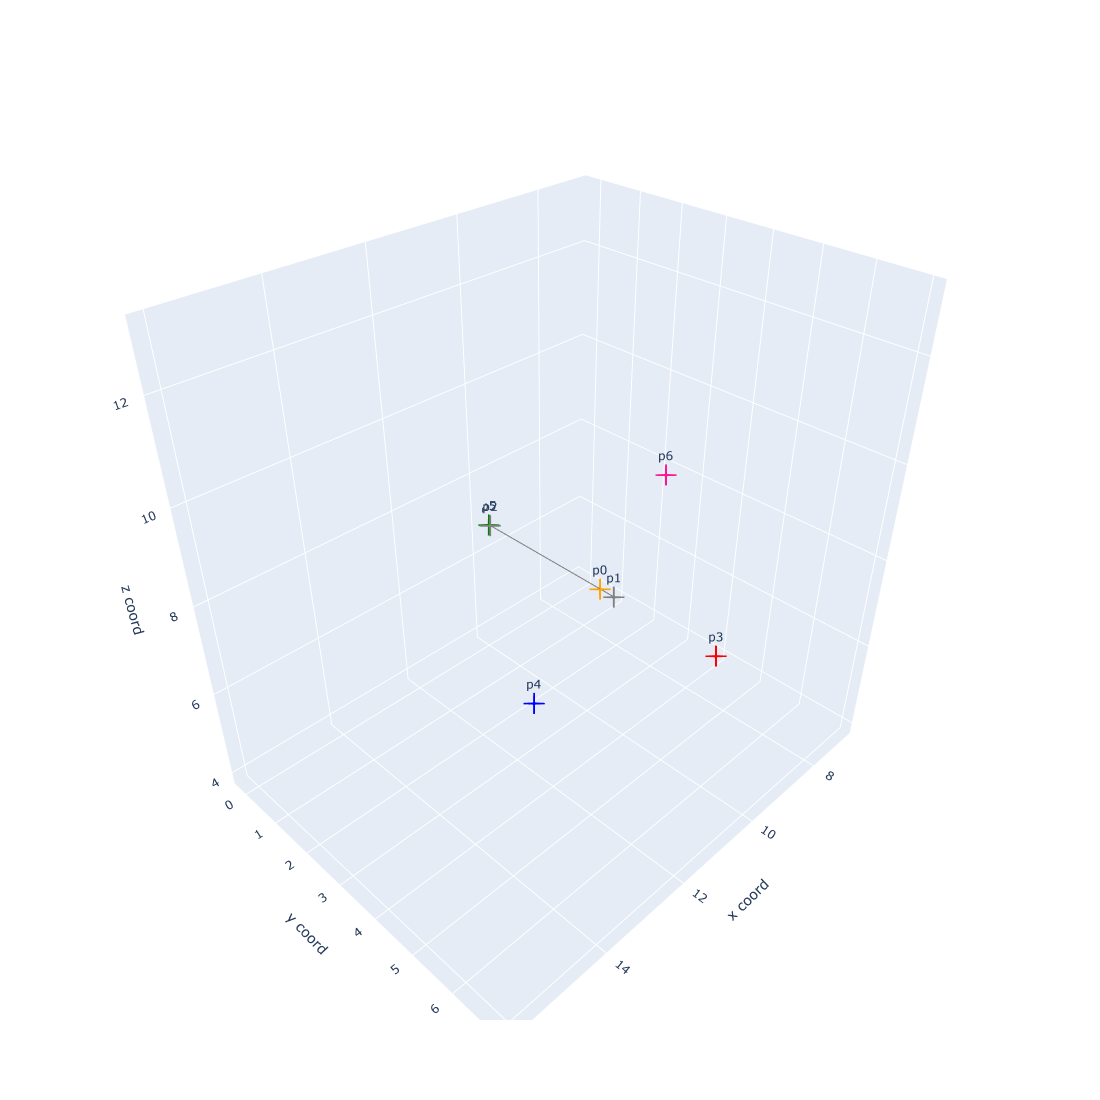

In [27]:
fig = go.Figure(data =[go.Scatter3d(x = df["x"],
                                    y = df["y"],
                                    z = df["z"],
                                    text = df["name"],
                                    mode = "markers+text",
                                marker=dict(color=df["c"], size=10, symbol="cross"))])

fig.add_trace(
        go.Scatter3d(x = [p1[0], p2[0]],
                     y = [p1[1], p2[1]],
                     z = [p1[2], p2[2]],
                     mode ='lines',
                     marker=dict(color="gray", size=10)))

fig.update_layout(
    width=1100, 
    height=1100,
    scene=dict(xaxis_title='x coord',yaxis_title='y coord',zaxis_title='z coord'),
    showlegend=False)
fig.show("png")

##########################################################

In [22]:
random.seed(25)
p1 = np.array([randrange(1,10) for i in range(3)])
p2 = np.array([randrange(3,17) for i in range(3)])

d01_list = [1,2,3,4,5,6]
r_list = [7,6,5,4,3,2]
color = ["lightgreen", "lightpink", "lightskyblue", "lightgray", "lightcoral", "lightgoldenrodyellow"]

In [23]:
## line
fig_base = go.Figure(data =[go.Scatter3d(x=[p1[0],p2[0]], y=[p1[1], p2[1]],z=[p1[2], p2[2]],
                                    mode = "markers+lines",
                                    marker=dict(color="gray", size=15, symbol="cross"),
                                    line=dict(color="gray", width=5))])
fig_base.update_layout(
    width=1100, height=1100,
    scene=dict(xaxis_title='x coord',yaxis_title='y coord',zaxis_title='z coord'),showlegend=False)

for d01, r, c in zip(d01_list, r_list, color):
    # p0 position
    line = LineString([p1, p2])
    p0_tmp = line.interpolate(d01)
    p0 = np.array([p0_tmp.x, p0_tmp.y, p0_tmp.z])
    # preparation
    P1 = p0
    P2 = p2
    Radius = r
    V3 = P1 - P2
    V3 = V3 / np.linalg.norm(V3)
    e = np.array([0,0,0])
    e[np.argmin(np.abs(V3))] = 1
    V1 = np.cross(e, V3)
    V1 = V1 / np.linalg.norm(V3)
    V2 = np.cross(V3, V1)

    # p3 90 degree
    s3 = np.pi/2
    p3 = P1 + Radius*( np.cos(s3)*V1 + np.sin(s3)*V2 ) 
    # p4 180 degree
    s4 = np.pi
    p4 = P1 + Radius*( np.cos(s4)*V1 + np.sin(s4)*V2 ) 
    # p5 270 degree
    s5 = np.pi*1.5
    p5 = P1 + Radius*( np.cos(s5)*V1 + np.sin(s5)*V2 )
    # p6 0 degree
    s6 = 0
    p6 = P1 + Radius*( np.cos(s6)*V1 + np.sin(s6)*V2 )

    # draw
    ## line
    fig = go.Figure(data =[go.Scatter3d(x=[p1[0],p2[0]], y=[p1[1], p2[1]],z=[p1[2], p2[2]],
                                        mode = "markers+lines",
                                        marker=dict(color="gray", size=15, symbol="cross"),
                                        line=dict(color="gray", width=5))])
    ## plane
    plane1_x, plane1_y, plane1_z = np.array([p6, p3, p5]).T
    fig_base.add_trace(go.Mesh3d(x=plane1_x, y=plane1_y, z=plane1_z, color=c, name = "", hoverinfo="skip", opacity=0.50))

    plane2_x, plane2_y, plane2_z = np.array([p4, p3, p5]).T
    fig_base.add_trace(go.Mesh3d(x=plane2_x, y=plane2_y, z=plane2_z, color=c, name = "", hoverinfo="skip", opacity=0.50))

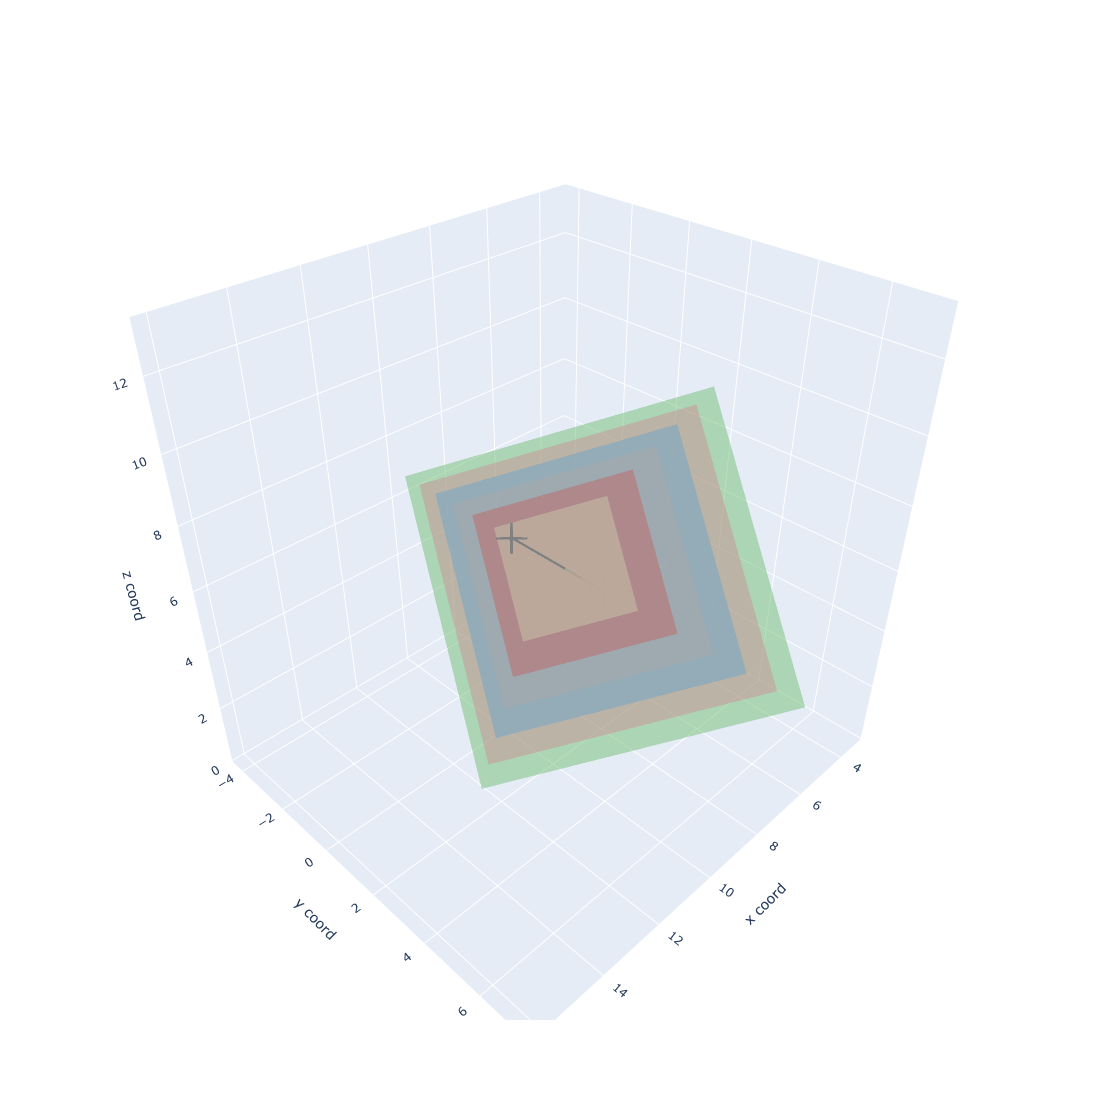

In [25]:
fig_base.show("png")